In [27]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import seaborn as sns

In [28]:
df = pd.read_csv('../CSVs/Labeled_Columns_Data.csv')
df_dummies = pd.get_dummies(df, columns = ['Gender', 'Fasting Blood Sugar > 120 mg/dl', 'Resting Electrocardiographic Results', 'Exercise Induced Angina', 'Slope of the Peak Exercise ST Segment', 'Vessels Colored by Fluoroscopy', 'Thalium Stress Test Result', 'Diagnosis of Heart Disease (Angiographic Disease Status)'])
df_dummies = df_dummies.drop('Unnamed: 0', axis=1)
df_female = df_dummies.loc[df_dummies['Gender_1'] == 0]
df_female.head()

,Age,Chest Pain Type,Resting Blood Pressure (mmHg),Serum Cholestorol (mg/dl),Maximum Heart Rate Achieved,ST Depression (induced by exercise relative to rest),Gender_0,Gender_1,Fasting Blood Sugar > 120 mg/dl_0,Fasting Blood Sugar > 120 mg/dl_1,...,Vessels Colored by Fluoroscopy_1,Vessels Colored by Fluoroscopy_2,Vessels Colored by Fluoroscopy_3,Vessels Colored by Fluoroscopy_4,Thalium Stress Test Result_0,Thalium Stress Test Result_1,Thalium Stress Test Result_2,Thalium Stress Test Result_3,Diagnosis of Heart Disease (Angiographic Disease Status)_0,Diagnosis of Heart Disease (Angiographic Disease Status)_1
2,41,1,130,204,172,1.4,1,0,1,0,...,0,0,0,0,0,0,1,0,0,1
4,57,0,120,354,163,0.6,1,0,1,0,...,0,0,0,0,0,0,1,0,0,1
6,56,1,140,294,153,1.3,1,0,1,0,...,0,0,0,0,0,0,1,0,0,1
11,48,2,130,275,139,0.2,1,0,1,0,...,0,0,0,0,0,0,1,0,0,1
14,58,3,150,283,162,1.0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,1


In [29]:
X = df_female.iloc[:,0:-1]  #independent columns
y = df_female.iloc[:,-1]    #target column i.e price range

In [30]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                                                Specs      Score
27  Diagnosis of Heart Disease (Angiographic Disea...  72.000000
2                       Resting Blood Pressure (mmHg)  40.897099
5   ST Depression (induced by exercise relative to...  34.059810
26                       Thalium Stress Test Result_3  30.422222
1                                     Chest Pain Type  23.520000
3                           Serum Cholestorol (mg/dl)  22.838629
14                          Exercise Induced Angina_1  17.515152
4                         Maximum Heart Rate Achieved  16.057715
21                   Vessels Colored by Fluoroscopy_3  12.000000
17            Slope of the Peak Exercise ST Segment_2  10.463768


C:\Users\Mark\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[1.28744679e-02 4.38118931e-02 1.02570708e-02 9.35185185e-03
 1.26984127e-03 2.19158086e-02 0.00000000e+00 0.00000000e+00
 1.68833672e-02 7.93591723e-03 1.36866582e-02 1.67222684e-02
 4.76190476e-03 2.37059527e-02 7.63814572e-02 7.63094330e-03
 1.48838054e-02 4.03726590e-02 2.18188293e-02 1.20555841e-04
 4.64207615e-02 2.68975431e-02 0.00000000e+00 0.00000000e+00
 0.00000000e+00 6.04269021e-02 9.39619642e-02 4.27907577e-01]


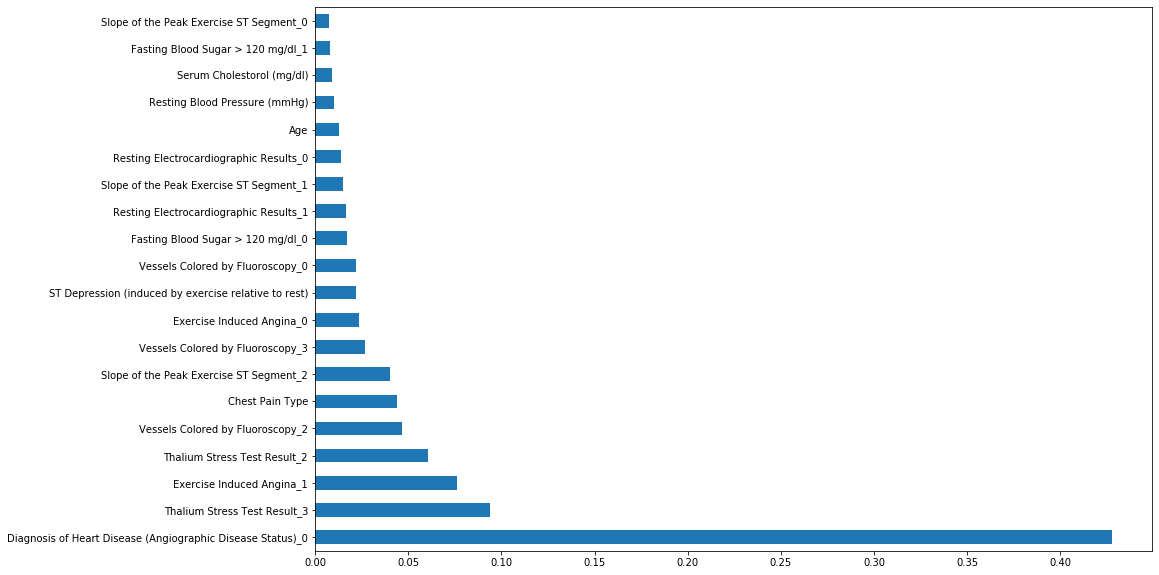

<Figure size 432x288 with 0 Axes>

In [31]:
X = df_female.iloc[:,0:-1]  #independent columns
y = df_female.iloc[:,-1]    #target column i.e price range
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh', figsize=(15,10))
plt.show()
plt.savefig('../Plots/femaleFeatureSelection_bar.png')

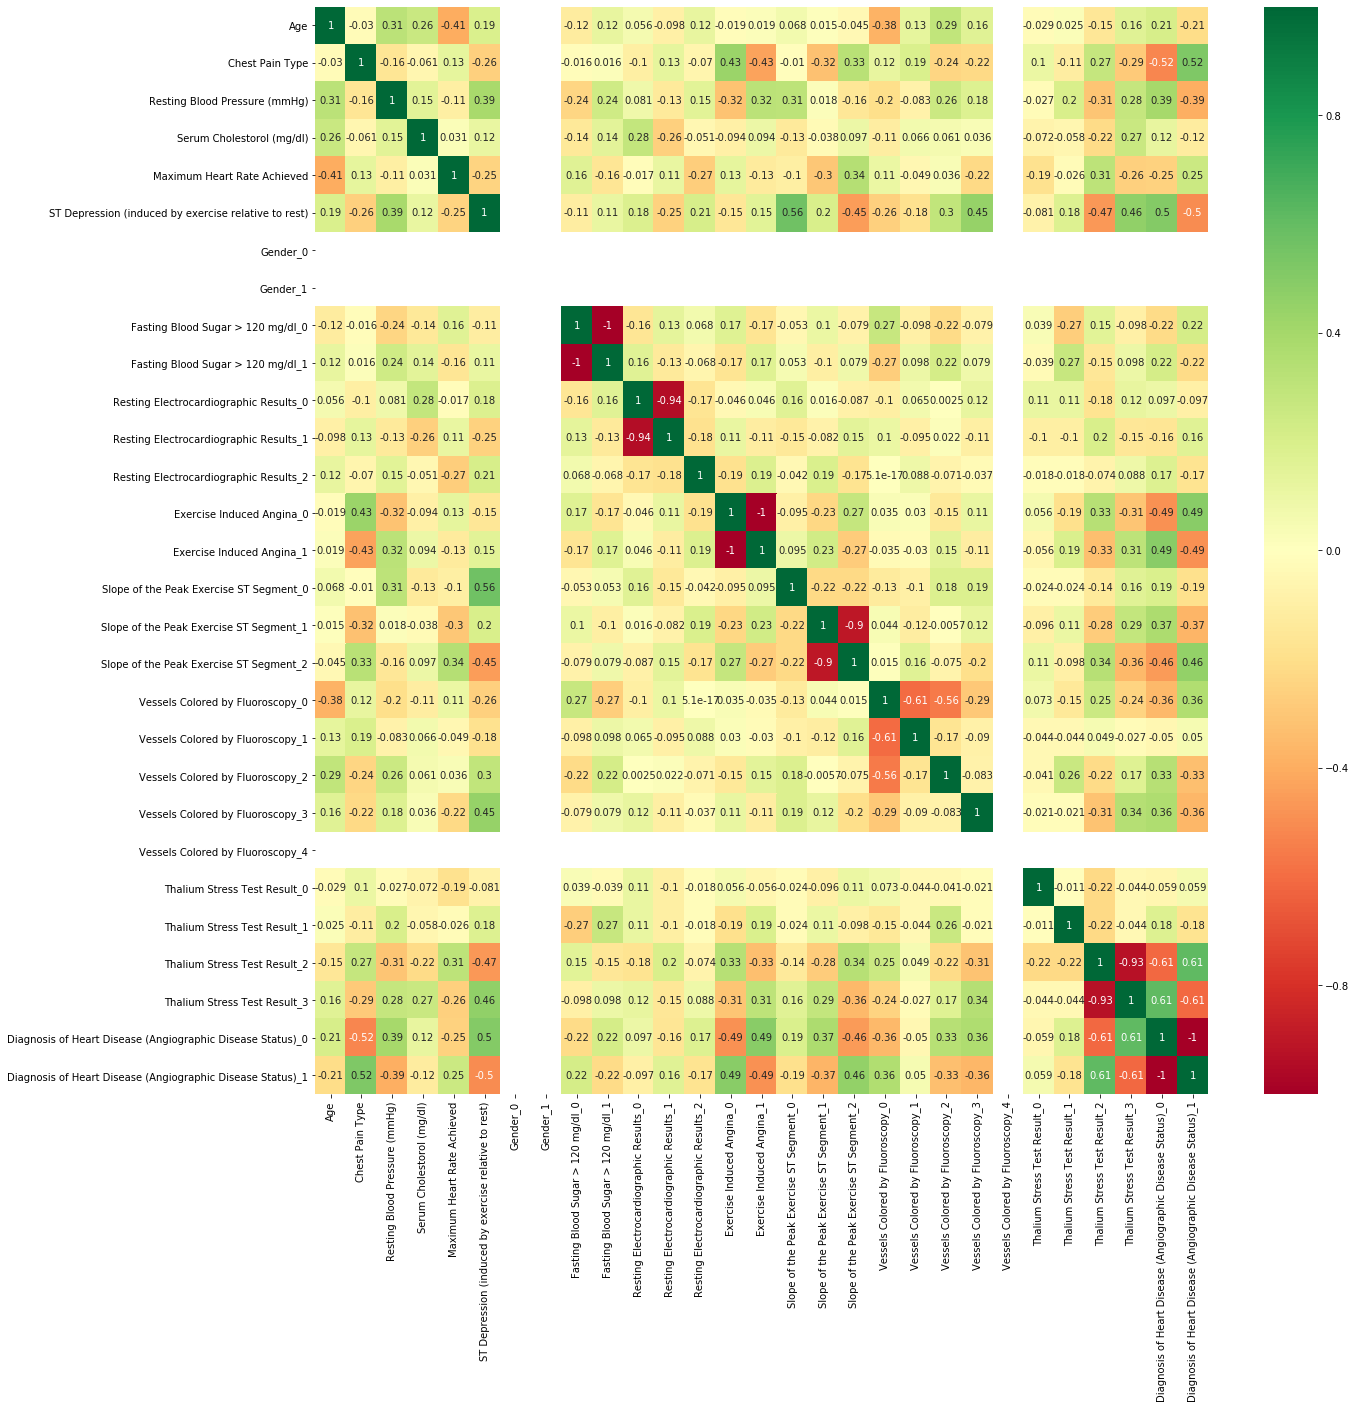

In [32]:
X = df_female.iloc[:,0:-1]  #independent columns
y = df_female.iloc[:,-1]    #target column i.e price range
#get correlations of each features in dataset
corrmat = df_female.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df_female[top_corr_features].corr(),annot=True,cmap="RdYlGn")
plt.savefig('../Plots/femaleFeatureSelection_heatmap.png')